## Code submitted by: Chirag Verma

### Prob 3d:
Given: 
$$\frac{dn}{dt} = n - \frac{5q^4}{1+q^4}n$$
$$\frac{dq}{dt} = 10^4 \left(0.02 + 0.5\frac{q^4}{1+q^4}\right)n - 0.3\cdot10^4q$$

To Plot: the nullclines and the phase space dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Define the model
# y = [n, q]
def quorumSensing(t, y):
    epsilon = 10**(-4)
    m = 4
    dndt = y[0] - (5*y[0]*y[1]**m)/(1 + y[1]**m)
    dqdt = y[0]*(0.02 + 0.5*(y[1]**m/(1 + y[1]**m)))/epsilon - 0.3*y[1]/epsilon
    return [dndt, dqdt]

In [3]:
# Solving the model

# Initial Conditions
q_in = 2
n_in = 3

# Time domain for integration
t_start = 0
t_end = 30
t = np.linspace(t_start, t_end, 100)

# Solution
solution = solve_ivp(quorumSensing, [t_start,t_end], [n_in, q_in], dense_output=True)


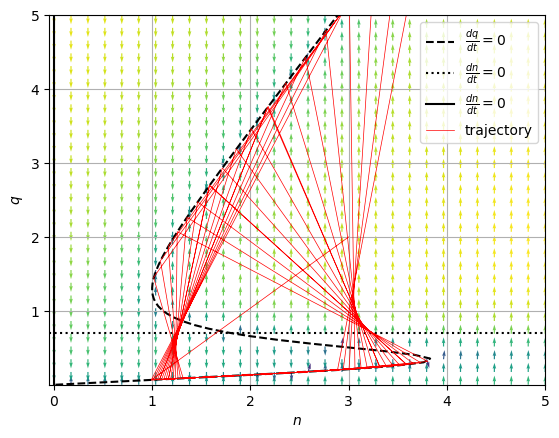

In [4]:
# x and y axes ranges for the plot
lowerBound = 0.001
upperBound = 5

# Setting the ground for the phase plot
samples = 30
x = np.linspace(lowerBound, upperBound, samples)
y = np.linspace(lowerBound, upperBound, samples)
X,Y = np.meshgrid(x, y)
DX,DY = quorumSensing(0, [X,Y])
nrm = np.sqrt(DX**2 + DY**2)

# Setting the ground for the nullcline
q = np.linspace(lowerBound, upperBound, 100)

# Plotting
fig, ax = plt.subplots()
ax.quiver(X, Y, DX/nrm, DY/nrm, np.log(nrm))
ax.plot(0.3*q/(0.02 + 0.5*(q**4/(1+q**4))), q, color="k", lw = "1.5", linestyle="--", label = r"$\frac{dq}{dt} = 0$")
ax.axhline(y = 1/np.sqrt(2), color="k", lw = "1.5", label = r"$\frac{dn}{dt} = 0$", linestyle=":")
ax.axvline(x = 0, color="k", lw = "1.5", label = r"$\frac{dn}{dt} = 0$")
ax.plot(solution.sol(t).T[:, 0], solution.sol(t).T[:, 1], lw = "0.5", linestyle="-", color="red", label="trajectory")
ax.set_xlim([lowerBound-0.05, upperBound])
ax.set_ylim([lowerBound, upperBound])
ax.legend(loc = "best")
ax.set_xlabel("$n$")
ax.set_ylabel("$q$")
ax.grid()

